# Basic modeling

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Read data
d = pd.read_csv('rh_data.csv')
d.head(5)

,id,work,gender,age,treatment,before,after
0,1,Stables,Male,16,garlic,113,58
1,2,Barracks,Male,28,garlic,137,83
2,3,Kitchen,Female,30,garlic,73,39
3,4,Stables,Male,27,garlic,156,90
4,5,Barracks,Male,10,garlic,70,22


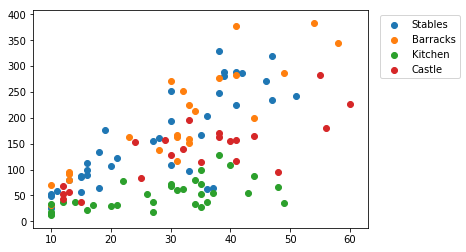

In [3]:
ax = plt.axes()
for w in d.work.unique():
    ax = plt.scatter(d[d.work==w].age, d[d.work==w].before, label=w)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left'); # First set a box, then position the legend within this box

In [9]:
pd.get_dummies(d).head(4)
# drop_first=True is an option, but makes interpretation harder, right?

,id,age,before,after,work_Barracks,work_Castle,work_Kitchen,work_Stables,gender_Female,gender_Male,treatment_garlic,treatment_silver
0,1,16,113,58,0,0,0,1,0,1,1,0
1,2,28,137,83,1,0,0,0,0,1,1,0
2,3,30,73,39,0,0,1,0,1,0,1,0
3,4,27,156,90,0,0,0,1,0,1,1,0


In [25]:
dd = pd.get_dummies(d)
col_names  = list(dd.columns)
rm_names = ['id','before','after']
col_names = [a for a in dd if a not in rm_names] # Filter using list comprehension?

In [36]:
model = LinearRegression()
model.fit(dd[col_names].values , dd[['before']].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
model.intercept_

array([8.6326095])

In [45]:
pd.DataFrame(model.coef_.transpose() , col_names)

,0
age,4.289491
work_Barracks,65.892921
work_Castle,-21.428896
work_Kitchen,-81.464821
work_Stables,37.000797
gender_Female,13.220276
gender_Male,-13.220276
treatment_garlic,8.225804
treatment_silver,-8.225804


In [56]:
guess = model.predict(dd[col_names].values)

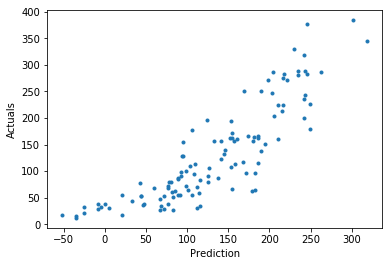

In [61]:
plt.plot(guess,d[['before']],'.')
plt.xlabel('Prediction')
plt.ylabel('Actuals');

In [67]:
print('RMS: ',np.sqrt(metrics.mean_squared_error(guess, d[['before']].values)))

RMS:  46.64837239652504


Finish this: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f